# Afame Technologies Data Science Project

## About 
The Iris flower data set is a multivariate data set introduced by the British statistician and biologist Ronald Fisher in his 1936 paper
The Use of multiple measurements in Taxonomic Problems. It is sometimes called Anderson's Iris data set because Edgar Anderson
collected the data to quantify the morphologic variation of Iris flowers of three related species. The data set consists of 50 samples
from each of three species of Iris (Iris setosa, Iris virginica, and Iris versicolor). Four features were measured from each sample: the
length and the width of the sepals and petals, in centimetcation tasks.

## Objective:-
The Iris flower dataset consists of three species: setosa, versicolor, and virginica. These species can be distinguished based on
their measurements. Now, imagine that you have the measurements of Iris flowers categorized by their respective species.
Your objective is to train a machine learning model that can learn from these measurements and accurately classify the Iris
flowers into their respective species.
Use the Iris dataset to develop a model that can classify iris flowers into different species based on their sepal and petal
measurements. This dataset is widely used for introductory classification tasks.

In [4]:
# Reading and Accessing Data:
import pandas as pd
data = pd.read_csv("IRIS Flower (1).csv")
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Data Cleaning

In [37]:
# Checking for missing values:
var = data.isna().sum()
if var.any() != 0:
    print("There are missing values")
    print(data.isna().sum())
else:
    print("There are no missing values")

There are no missing values


In [9]:
# Data researching
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


## Exploratory Data Analysis

In [22]:
# finding the number of classes in the target column 
x = data["species"].value_counts()
x

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

<Axes: >

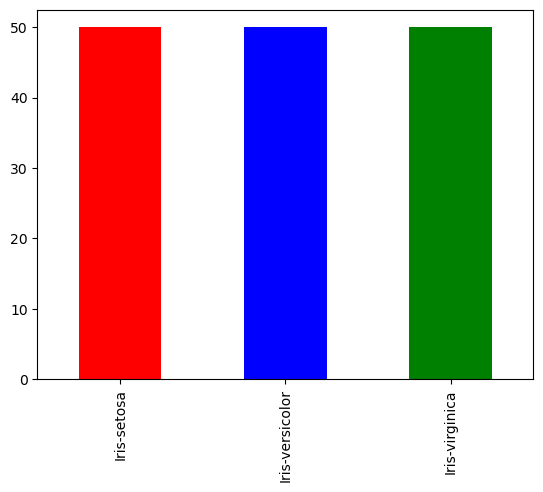

In [29]:
x.plot(kind = "bar",color=["red","blue","green"])

<Axes: xlabel='species'>

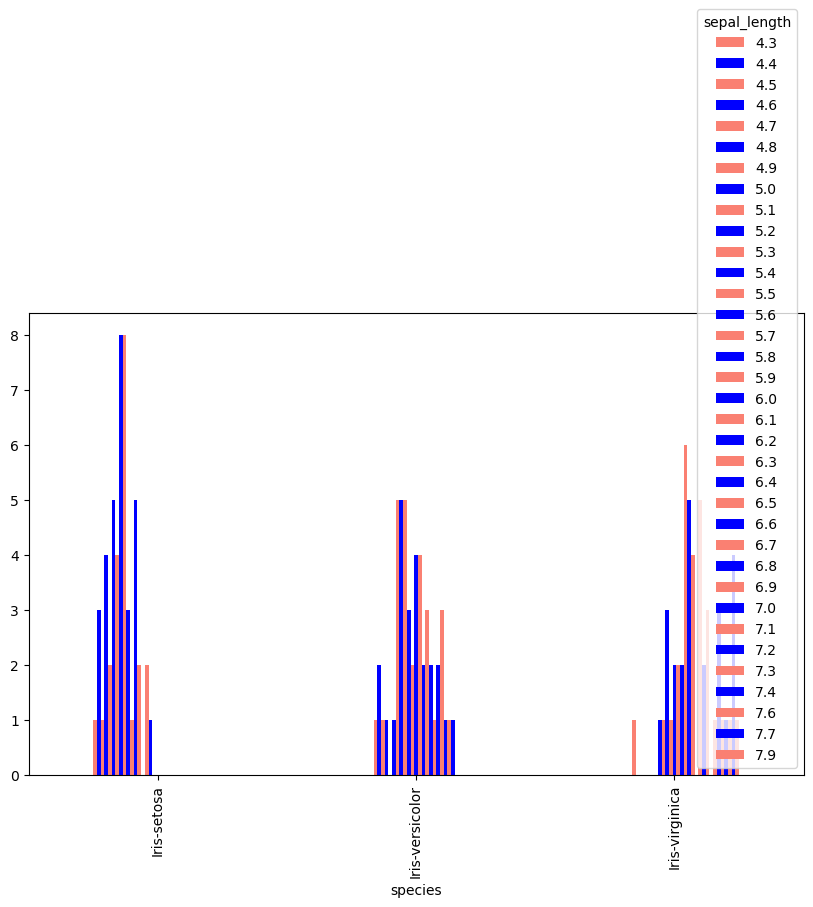

In [33]:
data.sepal_length.value_counts()
y = pd.crosstab(data.species,data.sepal_length)
y.plot(kind="bar", figsize = (10,6),color = ["salmon","blue"])

## Data Splitting

In [63]:
import numpy as np
X = data.drop("species", axis=1)
y = pd.DataFrame(data['species'])
np.random.seed(42)
X, y
#from sklearn.model_selection import train_test_split
#x_train, x_test, y_train, y_test = tts(


(     sepal_length  sepal_width  petal_length  petal_width
 0             5.1          3.5           1.4          0.2
 1             4.9          3.0           1.4          0.2
 2             4.7          3.2           1.3          0.2
 3             4.6          3.1           1.5          0.2
 4             5.0          3.6           1.4          0.2
 ..            ...          ...           ...          ...
 145           6.7          3.0           5.2          2.3
 146           6.3          2.5           5.0          1.9
 147           6.5          3.0           5.2          2.0
 148           6.2          3.4           5.4          2.3
 149           5.9          3.0           5.1          1.8
 
 [150 rows x 4 columns],
             species
 0       Iris-setosa
 1       Iris-setosa
 2       Iris-setosa
 3       Iris-setosa
 4       Iris-setosa
 ..              ...
 145  Iris-virginica
 146  Iris-virginica
 147  Iris-virginica
 148  Iris-virginica
 149  Iris-virginica
 
 [150 rows 

In [66]:
# converting data to numbers
from sklearn.preprocessing import LabelEncoder

# Assuming y is your target variable in object type format
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Now y is in numerical format and you can proceed with the rest of your code


C:\Users\Neeraj Mathur\desktop\MLDL projects\env\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [58]:
#### we can also convert data to numbers using the below code of one hot encoder
# from sklearn.preprocessing import OneHotEncoder
# from sklearn.compose import ColumnTransformer
# data_to_convert = data["species"]
# one = OneHotEncoder()
# transformer = ColumnTransformer([("one",one,data_to_convert)],remainder="passthrough")
# transformed = transformer.fit_transform(y)
# target = pd.DataFrame(transformed)

In [67]:
from sklearn.model_selection import train_test_split as tts
#X_train, X_test, y_train, y_test = tts(transformed_x,transformed_y,test_size = 0.2)
X_train, X_test, y_train, y_test = tts(X,y,test_size = 0.2)

# Training and calculation of different Evaluation metrics

In [68]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Initialize models
models = {
    'Logistic Regression': LogisticRegression(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier()
}

# Train, test, and evaluate models
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)
    
    # Print the results
    print(f'Model: {model_name}')
    print(f'Accuracy: {accuracy * 100:.2f}%')
    print('Confusion Matrix:')
    print(conf_matrix)
    print('Classification Report:')
    print(class_report)
    print('-' * 60)

Model: Logistic Regression
Accuracy: 96.67%
Confusion Matrix:
[[14  0  0]
 [ 0  5  1]
 [ 0  0 10]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      0.83      0.91         6
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.94      0.95        30
weighted avg       0.97      0.97      0.97        30

------------------------------------------------------------
Model: Support Vector Machine
Accuracy: 96.67%
Confusion Matrix:
[[14  0  0]
 [ 0  5  1]
 [ 0  0 10]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      0.83      0.91         6
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.94      

### From the output we can seet that K nearest neighbors has the best accuracy

# Python function that takes featues as inputs and finds the species of the iris flower based on the given features of the flowers

In [92]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
X = data.drop("species", axis=1)
y = pd.DataFrame(data['species'])
np.random.seed(42)
# Convert target variable to numerical format if not already done
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
data 
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=3)  # You can choose an appropriate value for n_neighbors
knn.fit(X_train, y_train)

# Function
def predict_species(features):
    features = scaler.transform([features])
    prediction = knn.predict(features)
    
    # Convert the numerical prediction back to the original species name
    species = label_encoder.inverse_transform(prediction)
    
    return species[0]

# Example usage
example_features = [5.1, 3.5, 1.4, 0.2]
predicted_species = predict_species(example_features)
print(f'The predicted species is: {predicted_species}')


The predicted species is: Iris-setosa


C:\Users\Neeraj Mathur\desktop\MLDL projects\env\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Neeraj Mathur\desktop\MLDL projects\env\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
